In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/clevelandUpdated.csv')
df.head(10)

,age,gender,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,CHD
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [27]:
df.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restcg      0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
CHD         0
dtype: int64

In [28]:
df['CHD'] = df.CHD.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['gender'] = df.gender.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

df.describe()

,age,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,CHD
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,0.499120
min,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


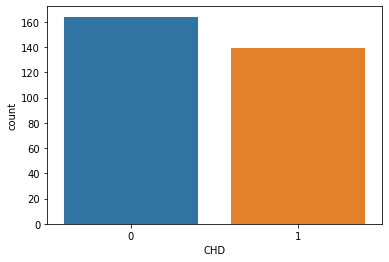

In [29]:
sns.countplot(x='CHD',data=df)

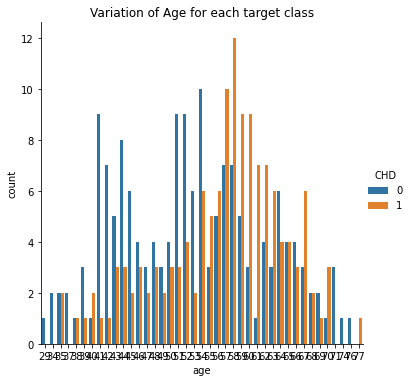

In [30]:
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'CHD', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

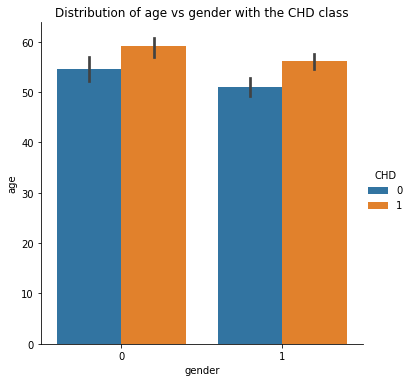

In [31]:
df['gender'] = df.gender.map({'female': 0, 'male': 1})
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'gender', hue = 'CHD')
plt.title('Distribution of age vs gender with the CHD class')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [42]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
result=classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [44]:
#Testing Accuracy Score

from sklearn.metrics import accuracy_score
predictions = result.predict(X_test)
accuracy_score(y_test,predictions)

0.8032786885245902

Prediction of New Values : 
Requires 13 values :
 age | gender | chestPain | restBP   | cholestoral | fastbloodSugar | restECG | MaxHeartRate  | exerciseInduceAngina | oldpeak     | slopeSTsegmnt  | ca      | thal; 
pred_new = classifier.predict([[ , , , , , , , , , , , , ]]) 
pred_new ##################################Here 0 : No CHD , 1 : CHD##################

In [45]:
pred_new = classifier.predict([[ 41, 0,2 ,130 ,204 ,0 ,2 ,172 ,0 ,1.4 ,1 ,0.0 ,3.0 ]])
pred_new

array([0])

In [46]:
pred_new = classifier.predict([[53,	1,	4,	140,	203,	1,	2	,155	,1	,3.1,	3	,0.0	,7.0	]])
pred_new

array([1])